# Analysis of text output from script

This script uses the .csv file generated by the new_openai_group.py script to analyze alignment between LLM agents. 

In [2]:
# loading in the .csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



# Load the data
df = pd.read_csv('run_2024-12-04_01-23-20_final.csv')

In [3]:
conversation = df['Conversation']

# Function to split text into sentences and remove agent references
def split_and_filter_text(text):
    # Split by colons first, then by sentences
    parts = text.split(':')
    sentences = []
    for part in parts:  # Skip the first part (agent name or irrelevant info)
        sentences.extend(re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!)\s', part))
    # Clean up sentences and remove empty strings
    return [sentence.strip() for sentence in sentences if sentence.strip()]

# Process the list to split and filter each entry
filtered_sentences = []
for text in conversation:
    filtered_sentences.extend(split_and_filter_text(text))

# Print or save the filtered sentences
print(filtered_sentences)

# Combine the text into one single string (if necessary)
full_text = ' '.join(filtered_sentences)

# Function to split text into turns
def split_into_turns(text):
    # Split the text by turn markers
    turns = re.split(r'\(Turn \d+\)', text)
    turn_ids = re.findall(r'\(Turn \d+\)', text)
    
    # Remove leading/trailing whitespace and pair turns with their IDs
    turn_data = []
    for i, turn in enumerate(turns[1:]):  # Skip the first split, which is before Turn 1
        turn_id = turn_ids[i]
        turn_text = turn.strip()
        turn_data.append((turn_id, turn_text))
    
    return turn_data

# Apply the function
turns = split_into_turns(full_text)

# Create a DataFrame from the processed turns
df_turns = pd.DataFrame(turns, columns=['Turn', 'Content'])

["['Starting Group task", "', '(Turn 1) Agent High_neuro has responded", 'Great!', 'Let’s get started on planning this birthday party.', 'First, we need to decide on a theme.', 'A cohesive theme will help us with decorations, games, and even the menu.', '\\n\\nI propose we go with a “Carnival” theme.', 'It’s fun and allows for a variety of games that can engage everyone.', 'Plus, we can decorate with bright colors and use fun party favors like cotton candy bags or mini carnival games.', 'What do you all think about this theme?', "\\n\\nLet’s discuss this idea and then move on to structuring the schedule.', '(Turn 2) Agent High_extra has responded", 'I love the Carnival theme, Agent High_neuro!', 'It definitely sets a lively mood and can appeal to guests of all ages.', 'We could even incorporate some glowing elements, like colorful LED necklaces and glow sticks, to enhance the festive atmosphere as the night progresses.', 'Imagine everyone participating in games while glowing in the dar

In [4]:
# Extract the text column into a list
text_list = df.iloc[:, 0].tolist()

# Function to split text into sentences and remove agent references
def split_and_filter_text(text):
    # Split by colons first, then by sentences
    parts = text.split(':')
    sentences = []
    for part in parts:  # Skip the first part (agent name or irrelevant info)
        sentences.extend(re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!)\s', part))
    # Clean up sentences and remove empty strings
    return [sentence.strip() for sentence in sentences if sentence.strip()]

# Process the list to split and filter each entry
filtered_sentences = []
for text in text_list:
    filtered_sentences.extend(split_and_filter_text(text))

# Print or save the filtered sentences
print(filtered_sentences)

["['High_neuro', 'High_extra', 'High_consc', 'High_open', 'High_agree', 'High_neuro', 'High_extra', 'High_consc', 'High_open', 'High_agree']"]


In [5]:
# Combine the text into one single string (if necessary)
full_text = ' '.join(filtered_sentences)

# Function to split text into turns
def split_into_turns(text):
    # Split the text by turn markers
    turns = re.split(r'\(Turn \d+\)', text)
    turn_ids = re.findall(r'\(Turn \d+\)', text)
    
    # Remove leading/trailing whitespace and pair turns with their IDs
    turn_data = []
    for i, turn in enumerate(turns[1:]):  # Skip the first split, which is before Turn 1
        turn_id = turn_ids[i]
        turn_text = turn.strip()
        turn_data.append((turn_id, turn_text))
    
    return turn_data

# Apply the function
turns = split_into_turns(full_text)

# Create a DataFrame from the processed turns
df_turns = pd.DataFrame(turns, columns=['Turn', 'Content'])

In [6]:
from termcolor import colored

# Alternating colors
colors = ['cyan', 'yellow']  # Feel free to customize colors
import textwrap

# Print each turn with alternating colors and improved readability
for index, row in df_turns.iterrows():
    color = colors[index % len(colors)]
    
    # Split the content into sentences based on full stops
    sentences = row['Content'].split('. ')
    wrapped_content = "\n".join(sentences)  # Add newline after each full stop
    
    # Print the formatted turn
    print(colored(f"Turn {row['Turn']}:{wrapped_content}", color))
    print("-" * 40)  # Separator between turns

The word 'Glowchum' appears in 0 turns.


Text(0, 0.5, 'Cumulative count of "Glowchum"')

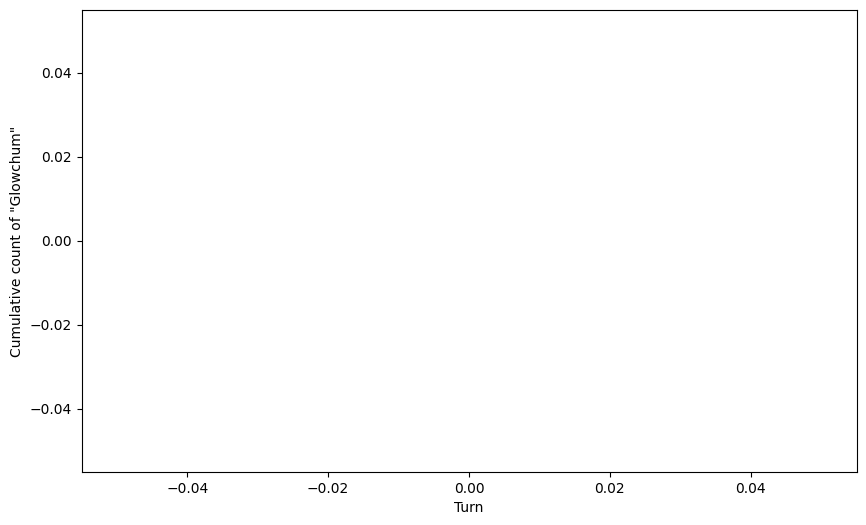

In [7]:
# finding the number of turns in df_turns that contains the word "Glowchum"

# Count the number of turns that contain the word "Glowchum"
glowchum_count = df_turns['Content'].str.contains('Glowchum', case=False).sum()

# Print the count
print(f"The word 'Glowchum' appears in {glowchum_count} turns.")

#visualise where the word "Glowchum" appears in the text, so a plot with the number of turns on the x-axis and the number of times "Glowchum" appears up to that turn on the y-axis.

# Create a list to store the cumulative count
cumulative_count = []
count = 0

# Iterate over the turns and count the occurrences of "Glowchum"
for index, row in df_turns.iterrows():
    count += row['Content'].lower().count('glowchum')
    cumulative_count.append(count)

# Adjust x-axis to start at 1
x_values = range(1, len(cumulative_count) + 1)

# Plot the cumulative count
plt.figure(figsize=(10, 6))
plt.plot(x_values, cumulative_count, marker='o')
plt.xlabel('Turn')
plt.ylabel('Cumulative count of "Glowchum"')

# Real analysis

The goal of this chunk is to do the following:

1. Load the data from the folder "runs"
2. extract the last row of each .csv file
3. add the row to a new dataframe called "data"

In [4]:
# go through each file in the "zipped_runs" folder
import pandas as pd
import os
import zipfile

# List all files in the directory
files = os.listdir('../data/runs')

# for each file in the directory, open the .csv file and extract the last row

# Create an empty dataframe to store values
last_rows = []
filenames = []

# Iterate over the files

for file in files:
    filename = file
    filenames.append(filename)
    # Open the file
    df = pd.read_csv(f'../data/runs/{file}')

    # Extract the last row of the DataFrame
    last_row = df.iloc[-1]
    last_rows.append(last_row)



In [5]:

# Create a DataFrame from the last rows and filenames
df_last_rows = pd.DataFrame(last_rows)
df_last_rows['Filename'] = filenames

# remove the last 6 rows from the dataframe
df_last_rows_2000 = df_last_rows[:-6]

In [6]:
# print the whole of the first row of the column "conversation" in the first row of the dataframe
print(df_last_rows_2000['Conversation'].iloc[0])

['Starting Group task:', "(Turn 1) Agent High_extra has responded: Great! Let’s dive into planning this birthday party. To start, we should establish a theme that can guide our decorations, music, and activities. Any ideas on a theme? It could be something fun and engaging, like a 'Carnival Night' or 'Retro Disco,' to set the mood for the party. \n\nWhat do you all think?", "(Turn 2) Agent High_open has responded: I love the idea of a theme to guide our planning! A 'Carnival Night' could be incredibly fun with bright colors, games, and some playful decorations. We could have carnival-style food, like popcorn and cotton candy, which would set a festive tone. Plus, incorporating some Glowchum would enhance the carnival atmosphere as guests can wear glowing accessories while they enjoy the games.\n\nAlternatively, 'Retro Disco' could also work well, creating a nostalgic vibe with disco balls, funky decorations, and upbeat music. We could encourage guests to dress up in retro outfits and d

High_open     430
High_extra    410
High_agree    404
High_consc    397
High_neuro    359
Name: Receiving_agent, dtype: int64


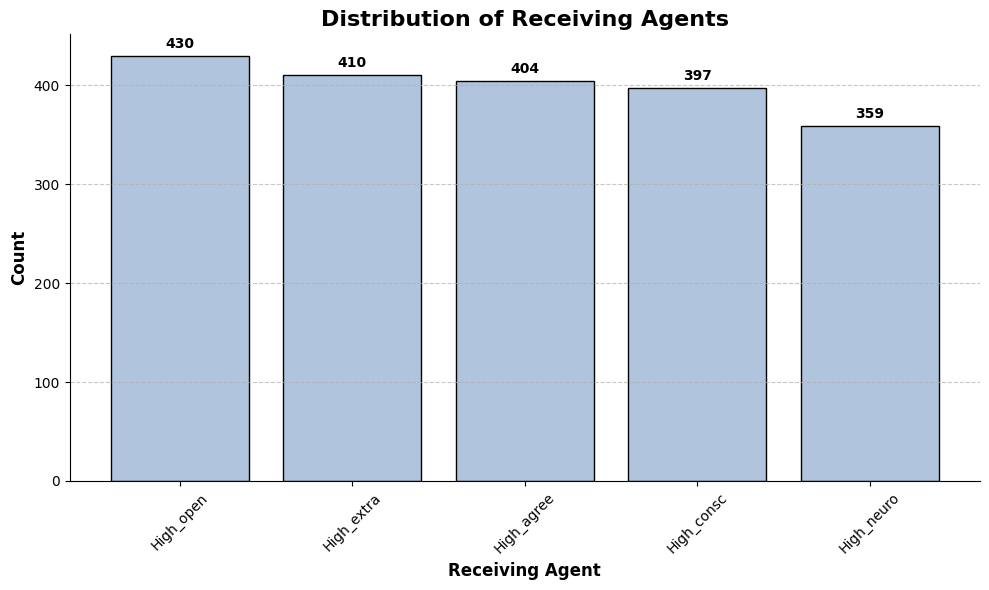

High_extra    439
High_agree    409
High_open     392
High_neuro    390
High_consc    370
Name: Introducing_agent, dtype: int64
Introducing_agent  Receiving_agent
High_agree         High_extra         115
                   High_open          113
                   High_consc          94
                   High_neuro          87
High_consc         High_open          108
                   High_agree          94
                   High_neuro          85
                   High_extra          83
High_extra         High_agree         119
                   High_open          119
                   High_consc         103
                   High_neuro          98
High_neuro         High_extra         119
                   High_consc          94
                   High_open           90
                   High_agree          87
High_open          High_consc         106
                   High_agree         104
                   High_extra          93
                   High_neuro          

In [10]:
import matplotlib.pyplot as plt
# Count the number of occurrences of each agent in the 'Receiving_agent' column
agent_counts1 = df_last_rows_2000['Receiving_agent'].value_counts()
print(agent_counts1)

# Visualize the counts with improved aesthetics
plt.figure(figsize=(10, 6))  # Adjust figure size for better clarity
bars = plt.bar(agent_counts1.index, agent_counts1.values, 
               color="lightsteelblue", edgecolor="black")  # Add color and border to bars

# Add title and axis labels with improved styling
plt.title("Distribution of Receiving Agents", fontsize=16, fontweight='bold')  # Title styling
plt.xlabel("Receiving Agent", fontsize=12, fontweight='bold')  # X-axis label styling
plt.ylabel("Count", fontsize=12, fontweight='bold')  # Y-axis label styling

# Rotate x-ticks and adjust font for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for improved readability (only on the Y-axis)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove unnecessary borders for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Optimize layout to ensure everything fits nicely
plt.tight_layout()

# Show the final plot
plt.show()


# Count the number of occurrences of each agent in the 'Introducing_agent' column
agent_counts = df_last_rows_2000['Introducing_agent'].value_counts()
print(agent_counts)

# now count the number of combinations of agents. So for each introducing_agent count the number of different receiving_agents

# Group the data by 'Introducing_agent' and count the unique 'Receiving_agent' values
agent_combinations = df_last_rows_2000.groupby('Introducing_agent')['Receiving_agent'].value_counts()
print(agent_combinations)

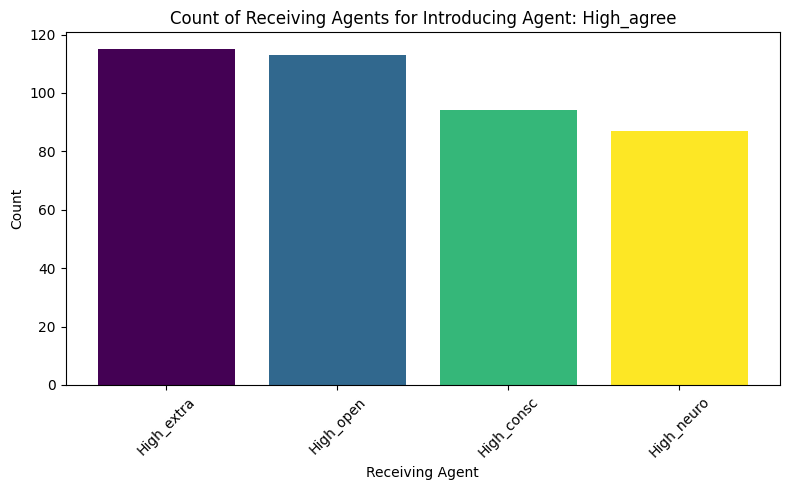

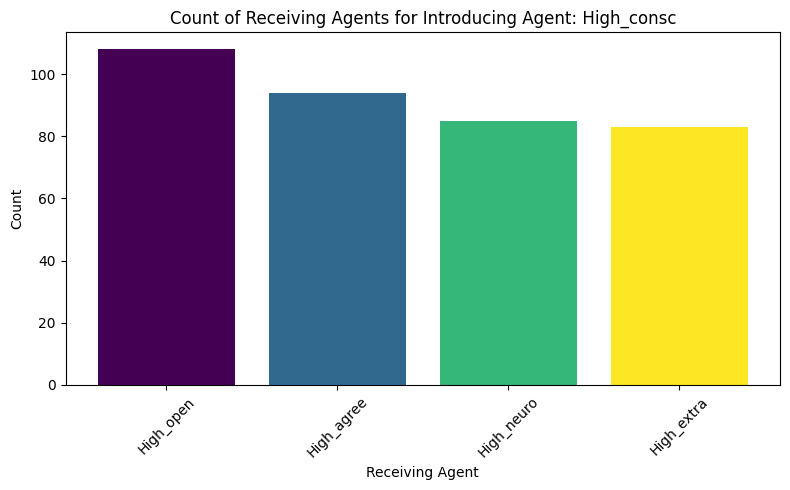

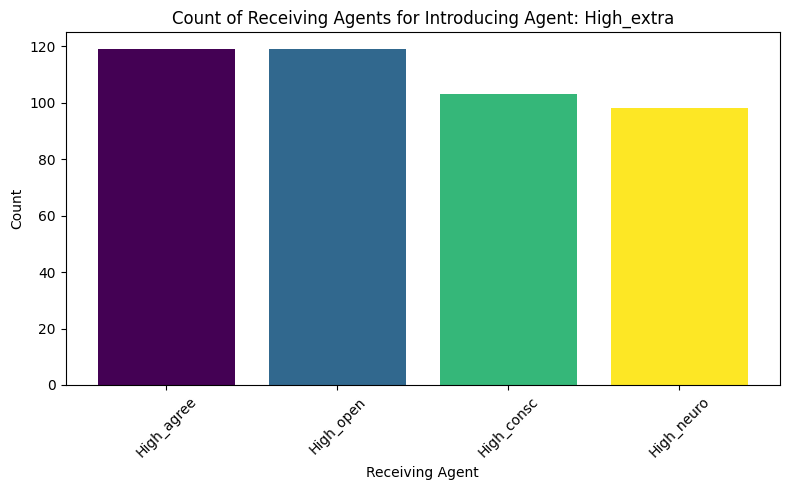

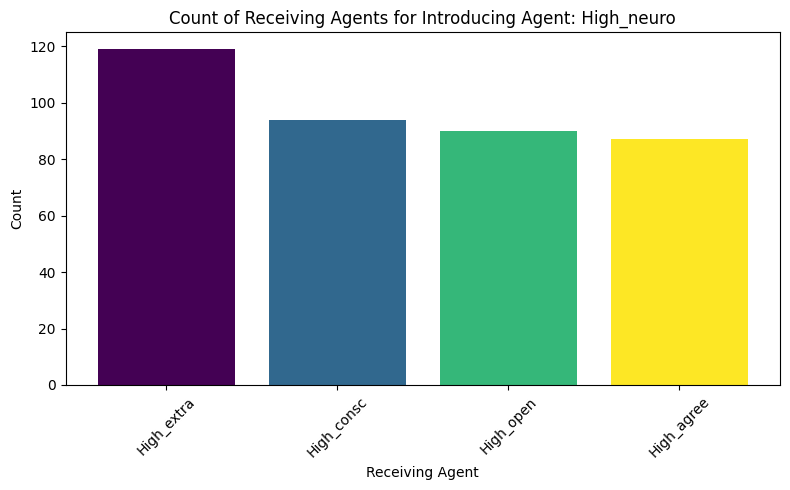

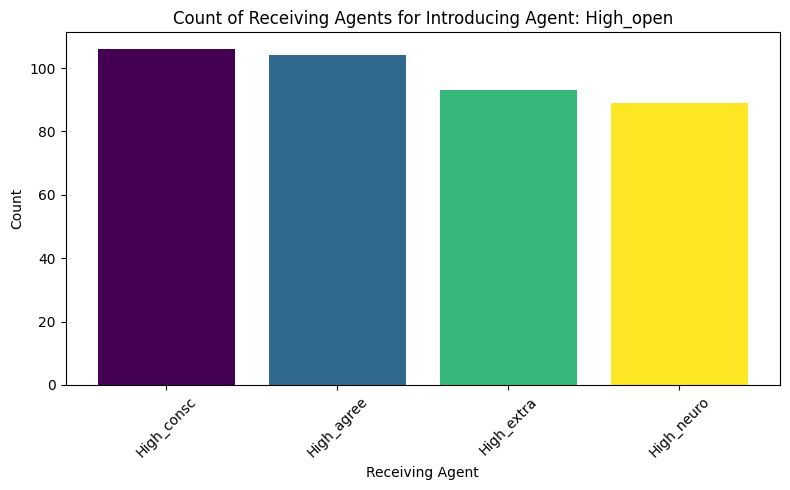

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Group and Count Data
# remove the last 6 rows from the dataframe
df_last_rows_2000 = df_last_rows[:-6]

# Group the data by 'Introducing_agent' and count the unique 'Receiving_agent' values
agent_combinations = df_last_rows_2000.groupby('Introducing_agent')['Receiving_agent'].value_counts()

# Convert the Series to a DataFrame for easier plotting
agent_combinations_df = agent_combinations.reset_index(name='count')

# Get unique introducing agents
introducing_agents = agent_combinations_df['Introducing_agent'].unique()

# Create individual plots for each introducing agent
for agent in introducing_agents:
    subset = agent_combinations_df[agent_combinations_df['Introducing_agent'] == agent]
    
    # Generate a colormap with a unique color for each bar
    colors = cm.viridis(np.linspace(0, 1, len(subset)))
    
    plt.figure(figsize=(8, 5))
    plt.bar(subset['Receiving_agent'], subset['count'], color=colors)
    
    plt.xlabel('Receiving Agent')
    plt.ylabel('Count')
    plt.title(f'Count of Receiving Agents for Introducing Agent: {agent}')
    plt.xticks(rotation=45)
    
    # Display each plot
    plt.tight_layout()
    plt.show()

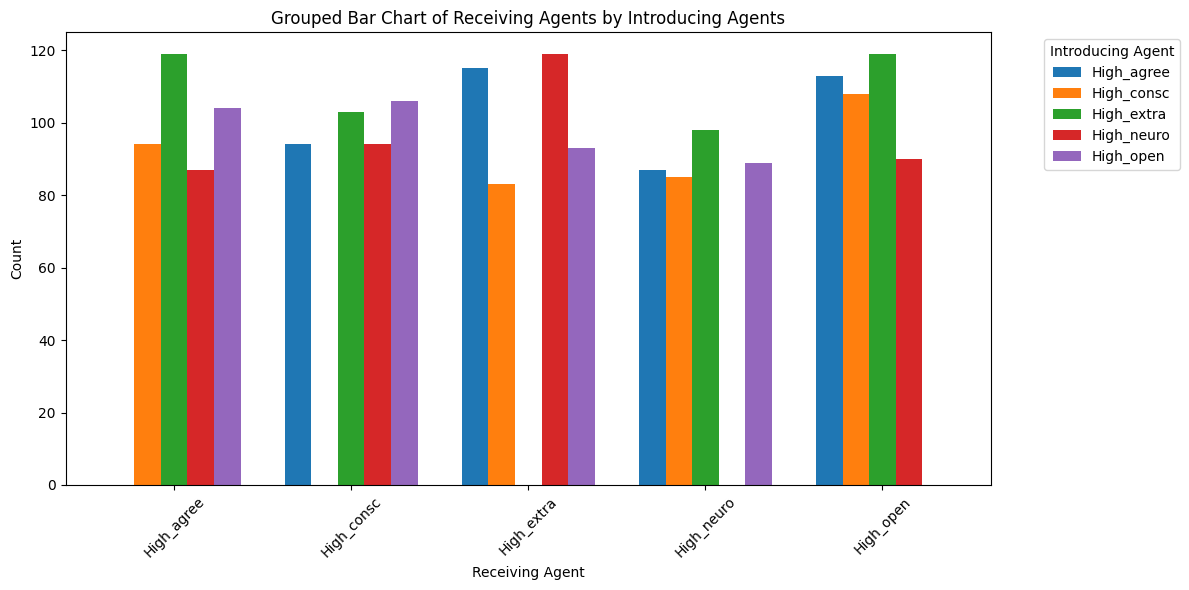

In [12]:
# Pivot the data for grouped bar chart format
pivot_df = agent_combinations_df.pivot(index='Receiving_agent', columns='Introducing_agent', values='count').fillna(0)

# Define the positions for the groups and bar width
x = np.arange(len(pivot_df.index))  # Positions for Receiving Agents
bar_width = 0.15  # Width of each bar
introducing_agents = pivot_df.columns  # Extract column names for agents

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
for i, agent in enumerate(introducing_agents):
    plt.bar(x + i * bar_width, pivot_df[agent], width=bar_width, label=agent)

# Customize the plot
plt.xlabel('Receiving Agent')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of Receiving Agents by Introducing Agents')
plt.xticks(x + bar_width * (len(introducing_agents) - 1) / 2, pivot_df.index, rotation=45)
plt.legend(title='Introducing Agent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

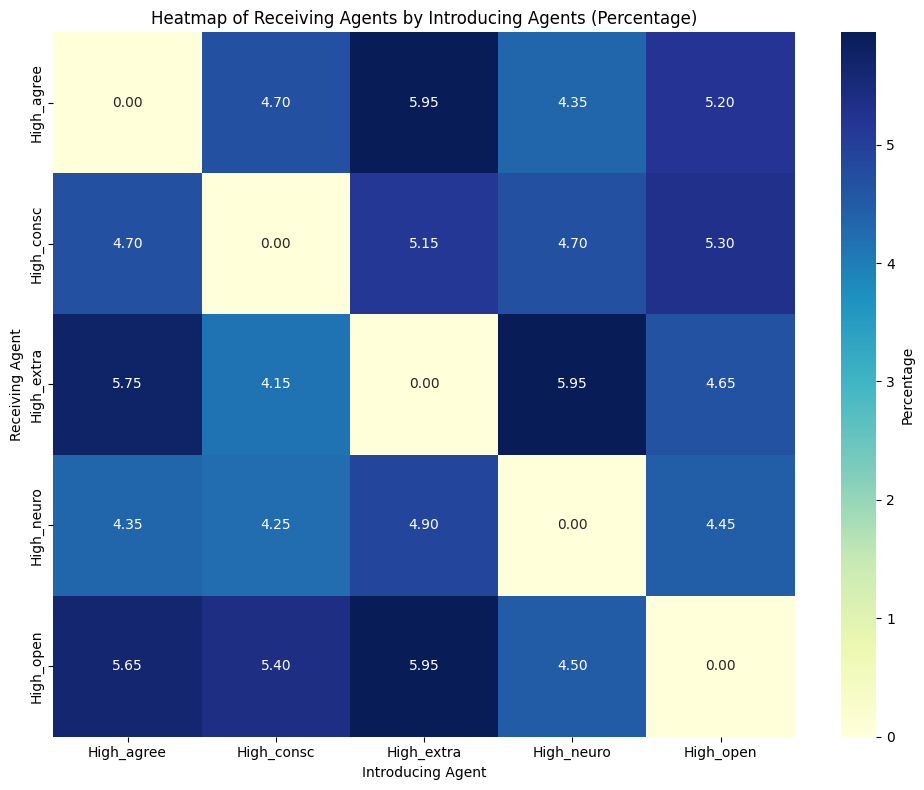

In [13]:
import seaborn as sns

# Calculate the percentages as a percentage of the total amount of runs (2000 runs)
pivot_df_percentage = (pivot_df / 2000) * 100

# Create a heatmap with percentage annotations
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_percentage, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})

plt.title('Heatmap of Receiving Agents by Introducing Agents (Percentage)')
plt.xlabel('Introducing Agent')
plt.ylabel('Receiving Agent')
plt.tight_layout()
plt.show()


In [20]:
df_last_rows.head()


,Agent_list,Introducing_agent,Receiving_agent,Conversation,turn_takings,Filename
205,"['High_extra', 'High_open', 'High_agree', 'Hig...",High_open,High_agree,"['Starting Group task:', ""(Turn 1) Agent High_...",10,run_2024-12-06_05-10-44.csv
19,"['High_neuro', 'High_consc', 'High_extra', 'Hi...",High_consc,High_extra,"['Starting Group task:', ""(Turn 1) Agent High_...",10,run_2024-12-05_20-21-29.csv
31,"['High_open', 'High_neuro', 'High_extra', 'Hig...",High_neuro,High_extra,"['Starting Group task:', ""(Turn 1) Agent High_...",10,run_2024-12-07_04-45-21.csv
89,"['High_open', 'High_consc', 'High_extra', 'Hig...",High_consc,High_extra,"['Starting Group task:', '(Turn 1) Agent High_...",10,run_2024-12-06_12-39-19.csv
23,"['High_extra', 'High_neuro', 'High_agree', 'Hi...",High_neuro,High_agree,"['Starting Group task:', '(Turn 1) Agent High_...",10,run_2024-12-05_20-26-34.csv


In [14]:
import re

# Initialize an empty list to hold the processed rows
turns_data = []

# Iterate through each row in df_last_rows_2000
for index, row in df_last_rows_2000.iterrows():
    text = row['Conversation']
    
    # Step 1: Split the text into turns
    turns = re.split(r'\(Turn \d+\)', text)
    turns = turns[1:]  # Skip the first empty string
    
    # Step 2: Extract turn numbers
    turn_numbers = re.findall(r'\(Turn \d+\)', text)
    
    # Step 3: Create a dictionary to hold turn data for this row
    row_data = {"Index": index}  # Add index to identify rows
    
    # Add each turn to the dictionary dynamically
    for i, turn_text in enumerate(turns):
        row_data[f"Turn {i+1}"] = turn_text.strip()
    
    # Append the dictionary to the turns_data list
    turns_data.append(row_data)

# Step 4: Create a new DataFrame from the processed turns data
df_turns = pd.DataFrame(turns_data)

In [15]:
# Reset the index of both DataFrames
df_last_rows_2000.reset_index(drop=True, inplace=True)
df_turns.reset_index(drop=True, inplace=True)

# merge the two dataframes
# Merge the DataFrames on the index column
df_merged = pd.merge(df_last_rows_2000, df_turns, left_index=True, right_index=True)

In [16]:
# Count the number of rows where "Glowchum" appears in Turn 3
glowchum_count_turn3 = df_merged['Turn 3'].str.lower().str.contains('glowchum', na=False).sum()

# Print the count
print(f"The word 'Glowchum' appears in {glowchum_count_turn3} Turn 3s out of the total {len(df_merged)} simulations.")

# now count the number of times the word "Glowchum" appears in turn 3 grouped by the receiving agent

# Count the number of rows where "Glowchum" appears in Turn 3 grouped by Receiving Agent
glowchum_counts_turn3 = df_merged[df_merged['Turn 3'].str.lower().str.contains('glowchum', na=False)]\
    .groupby('Receiving_agent')['Turn 3'].count()

# Print the counts
print(glowchum_counts_turn3)

# print the receiving agent counts
agent_counts = df_merged['Receiving_agent'].value_counts()
print(agent_counts)

# Calculate the percentage of occurrences of "Glowchum" in Turn 3 for each Receiving Agent
glowchum_percentages_turn3 = glowchum_counts_turn3 / agent_counts
print(glowchum_percentages_turn3)



The word 'Glowchum' appears in 1129 Turn 3s out of the total 2000 simulations.
Receiving_agent
High_agree    226
High_consc    214
High_extra    249
High_neuro    192
High_open     248
Name: Turn 3, dtype: int64
High_open     430
High_extra    410
High_agree    404
High_consc    397
High_neuro    359
Name: Receiving_agent, dtype: int64
High_agree    0.559406
High_consc    0.539043
High_extra    0.607317
High_neuro    0.534819
High_open     0.576744
dtype: float64


In [17]:
#print the column names
print(df_merged.columns)

Index(['Agent_list', 'Introducing_agent', 'Receiving_agent', 'Conversation',
       'turn_takings', 'Filename', 'Index', 'Turn 1', 'Turn 2', 'Turn 3',
       'Turn 4', 'Turn 5', 'Turn 6', 'Turn 7', 'Turn 8', 'Turn 9', 'Turn 10'],
      dtype='object')


In [18]:
# Loop through each column for Turn 1 to Turn 10
for turn in range(1, 11):  # From 1 to 10
    column_name = f'Turn {turn}'  # Generate column name like 'Turn 1', 'Turn 2', etc.
    
    # Count occurrences of "Glowchum" (case-insensitive) in the current column
    glowchum_counts = df_merged[column_name].str.lower().str.count('glowchum')
    
    # Create a new column to store the counts
    new_column_name = f'Glowchum_count_turn{turn}'  # Example: 'Glowchum_count_turn1'
    df_merged[new_column_name] = glowchum_counts

# Print the resulting DataFrame
print(df_merged)

                                             Agent_list Introducing_agent  \
0     ['High_extra', 'High_open', 'High_agree', 'Hig...         High_open   
1     ['High_neuro', 'High_consc', 'High_extra', 'Hi...        High_consc   
2     ['High_open', 'High_neuro', 'High_extra', 'Hig...        High_neuro   
3     ['High_open', 'High_consc', 'High_extra', 'Hig...        High_consc   
4     ['High_extra', 'High_neuro', 'High_agree', 'Hi...        High_neuro   
...                                                 ...               ...   
1995  ['High_neuro', 'High_consc', 'High_open', 'Hig...        High_consc   
1996  ['High_agree', 'High_extra', 'High_neuro', 'Hi...        High_extra   
1997  ['High_consc', 'High_neuro', 'High_extra', 'Hi...        High_neuro   
1998  ['High_extra', 'High_neuro', 'High_agree', 'Hi...        High_neuro   
1999  ['High_agree', 'High_extra', 'High_consc', 'Hi...        High_extra   

     Receiving_agent                                       Conversation  \


In [19]:
# save df_merged to a csv file called "preprocessed_data.csv"
df_merged.to_csv('preprocessed_data.csv', index=False)

    